In [37]:
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots  
import matplotlib.pyplot as plt


In [2]:
df_analysis = pd.read_csv('subset_newyork_data.csv')

### Creating smaller sample using a random split 

In [3]:
# Dataframe df_analysis
np.random.seed(32)

# Creating a smaller sample with 40% of the data
red_40 = np.random.rand(len(df_analysis)) < 0.40
small_2 = df_analysis[red_40]

# Saving the smaller sample to a CSV file
small_2.to_csv('reduced_data_to_plot_2.csv', index=False)

# Verifying the file size
file_size_2 = os.path.getsize('reduced_data_to_plot_2.csv')
file_size_mb_2 = file_size_2 / (1024 * 1024)
print(f"File size (40% sample): {file_size_mb_2:.2f} MB")

# Creating a smaller sample with 20% of the data
red_20 = np.random.rand(len(df_analysis)) < 0.20
small_3 = df_analysis[red_20]

# Saving the smaller sample to a CSV file
small_3.to_csv('reduced_data_to_plot_3.csv', index=False)

# Verifying the file size
file_size_3 = os.path.getsize('reduced_data_to_plot_3.csv')
file_size_mb_3 = file_size_3 / (1024 * 1024)
print(f"File size (20% sample): {file_size_mb_3:.2f} MB")

File size (40% sample): 1120.73 MB
File size (20% sample): 560.70 MB


### The sample_3 is still way higher than 25MB so obtaining the sample fraction from its file size and traget file size.

In [4]:

np.random.seed(32)

# Calculating the new sampling fraction for a slightly smaller file size
target_file_size_mb = 24.5  # Adjusted target file size slightly below 25 MB
current_file_size_mb_20 = 560.70
current_sampling_fraction = 0.20

# Calculating sample fraction to target a file size slightly below 25 MB
sample_fraction = (target_file_size_mb / current_file_size_mb_20) * current_sampling_fraction

# Sampling the data
red_target = np.random.rand(len(df_analysis)) < sample_fraction
small_dataset = df_analysis[red_target]  

# Saving the smaller sample to a CSV file with a new name
small_dataset.to_csv('reduced_data_to_plot.csv', index=False)  
# Verifying the file size
file_size = os.path.getsize('reduced_data_to_plot.csv')
file_size_mb = file_size / (1024 * 1024)
print(f"File size (target sample): {file_size_mb:.2f} MB")

File size (target sample): 24.53 MB


#### My sample_fraction is approximately 0.00875, which means I am sampling approximately 0.875% of the original df_analysis DataFrame to achieve a file size of 24.53 MB.

In [5]:
small_dataset.shape

(268627, 9)

In [7]:
small_dataset.dtypes

Unnamed: 0              int64
date                   object
rideable_type          object
start_station_name     object
end_station_name       object
avgTemp               float64
trip_count              int64
season                 object
value                   int64
dtype: object

### Obtaining top 10 most common routes to find which stations are close to water.

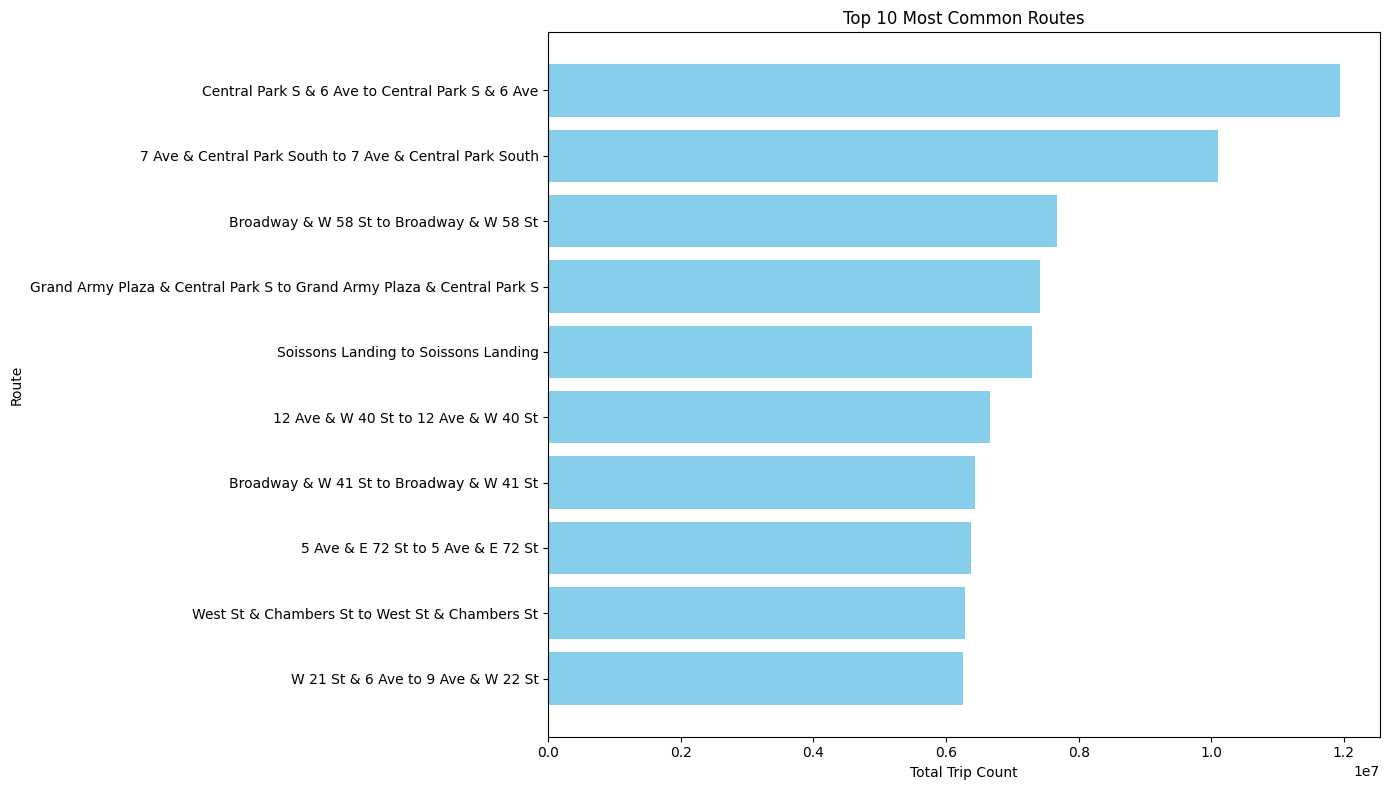

In [15]:
route_counts = small_dataset.groupby(['start_station_name', 'end_station_name'])['trip_count'].sum().reset_index()

# Renaming columns for clarity
route_counts.columns = ['start_station_name', 'end_station_name', 'total_trip_count']

# Sorting by total trip count in descending order
route_counts_sorted = route_counts.sort_values(by='total_trip_count', ascending=False)

# Selecting the top 10 most common routes
top_routes = route_counts_sorted.head(10)

# Plotting the top 10 most common routes
plt.figure(figsize=(14, 8))
plt.barh(top_routes['start_station_name'] + " to " + top_routes['end_station_name'], top_routes['total_trip_count'], color='skyblue')
plt.xlabel('Total Trip Count')
plt.ylabel('Route')
plt.title('Top 10 Most Common Routes')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest values at the top
plt.tight_layout()
plt.show()

### Obtaining plot to understand the variation of classic and elctric bikes usage amongst users of CitiBike. This plot would be helpful in understanding any correlation existing between usage of rideable bikes and seasons.

Classic Bike Counts:
   season  trip_count
0  winter       45857
1  spring       18168
2  summer       95042
3    fall       37844

Electric Bike Counts:
   season  trip_count
0  winter       25144
1  spring        7101
2  summer       27242
3    fall        9931


C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_12728\535315646.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_12728\535315646.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_12728\535315646.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

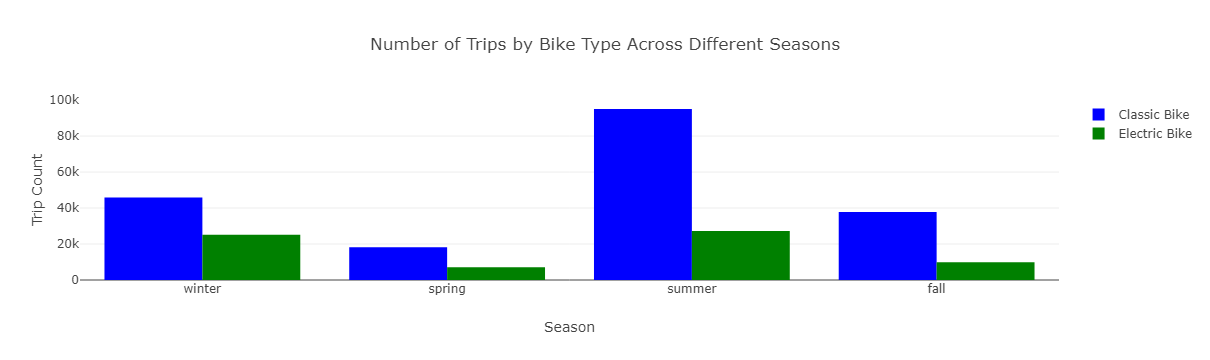

In [41]:
small_dataset['trip_count'] = pd.to_numeric(small_dataset['trip_count'], errors='coerce')


small_dataset['season'] = pd.Categorical(small_dataset['season'], categories=['winter', 'spring', 'summer', 'fall'], ordered=True)

# Filtering DataFrame by bike type using .loc
classic_bike = small_dataset.loc[small_dataset['rideable_type'] == 'classic_bike']
electric_bike = small_dataset.loc[small_dataset['rideable_type'] == 'electric_bike']

# Counting trip counts by season
classic_counts = classic_bike.groupby('season')['trip_count'].count().reset_index()
electric_counts = electric_bike.groupby('season')['trip_count'].count().reset_index()


print("Classic Bike Counts:")
print(classic_counts)
print("\nElectric Bike Counts:")
print(electric_counts)

# Creating the figure with subplots
fig = make_subplots(rows=1, cols=1)

# Adding bar charts to the figure
fig.add_trace(go.Bar(
    x=classic_counts['season'],
    y=classic_counts['trip_count'],
    name='Classic Bike',
    marker=dict(color='blue')
), row=1, col=1)

fig.add_trace(go.Bar(
    x=electric_counts['season'],
    y=electric_counts['trip_count'],
    name='Electric Bike',
    marker=dict(color='green')
), row=1, col=1)

# Update layout
fig.update_layout(
    title='Number of Trips by Bike Type Across Different Seasons',
    xaxis=dict(title='Season'),
    yaxis=dict(title='Trip Count'),
    barmode='group'  # Group bars side by side
)

# Display the figure
fig.show()

### The plot above provides a clear picture with respect to seasonal usage of bikes. Summer months being the most widely used season for classic bikes.

Classic bikes are rented 2.84 times more than electric bikes.


C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_12728\4076623770.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usha Bharati\AppData\Local\Temp\ipykernel_12728\4076623770.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



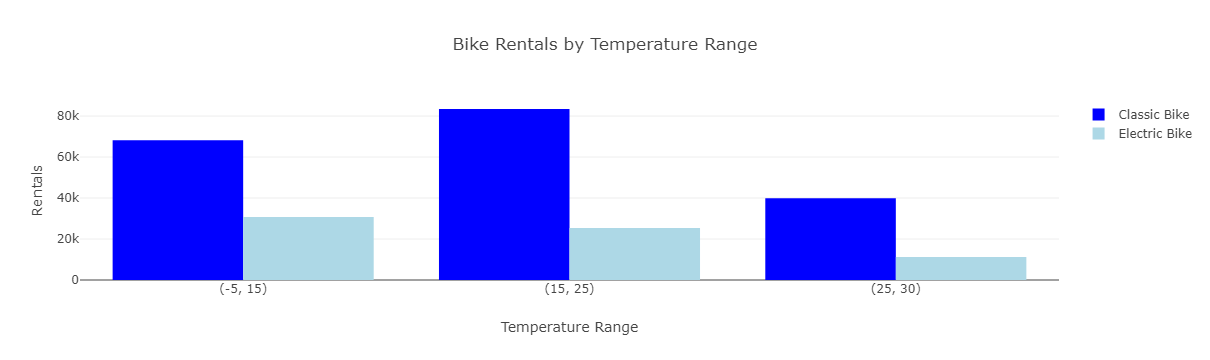

In [46]:
bins = [-5, 15, 25, 30]
labels = ['(-5, 15)', '(15, 25)', '(25, 30)']

# Categorizing temperatures into bins
small_dataset['temp_range'] = pd.cut(small_dataset['avgTemp'], bins=bins, labels=labels, right=False)

# Aggregating trip counts by bike type and temperature range
bike_counts = small_dataset.groupby(['rideable_type', 'temp_range'])['trip_count'].count().reset_index()

# Separating data for classic and electric bikes
classic_counts = bike_counts[bike_counts['rideable_type'] == 'classic_bike']
electric_counts = bike_counts[bike_counts['rideable_type'] == 'electric_bike']

# Creating the figure
fig = go.Figure()

# Adding bar charts for classic and electric bikes
fig.add_trace(go.Bar(
    x=classic_counts['temp_range'],
    y=classic_counts['trip_count'],
    name='Classic Bike',
    marker=dict(color='blue'),
))

fig.add_trace(go.Bar(
    x=electric_counts['temp_range'],
    y=electric_counts['trip_count'],
    name='Electric Bike',
    marker=dict(color='lightblue'),
))

# Update layout
fig.update_layout(
    title='Bike Rentals by Temperature Range',
    xaxis=dict(title='Temperature Range'),
    yaxis=dict(title='Rentals'),
    barmode='group',  # Group bars side by side
)

# Calculating the total trip counts for classic and electric bikes
classic_rental_count = classic_counts['trip_count'].sum()
electric_rental_count = electric_counts['trip_count'].sum()

# Calculating the ratio
rental_ratio = classic_rental_count / electric_rental_count

print(f"Classic bikes are rented {rental_ratio:.2f} times more than electric bikes.")

# Show the figure
fig.show()

#### The plot implies that the classic bikes are used more frequently than electric bikes across all temperature ranges. There is no significant change in rental counts for electric bikes throughout the range. Moreover the classic bikes are rented 2.84 times more than electric bikes.